## Python

In [1]:
import sys
for i in range(1, 101):
    if i % 3 == 0:
        sys.stdout.write('Fizz')
        if i % 5 != 0:
            sys.stdout.write(' ')
    if i % 5 == 0:
        sys.stdout.write('Buzz ')
    if i % 3 != 0 and i % 5 != 0:
        sys.stdout.write(str(i) + ' ')

1 2 Fizz 4 Buzz Fizz 7 8 Fizz Buzz 11 Fizz 13 14 FizzBuzz 16 17 Fizz 19 Buzz Fizz 22 23 Fizz Buzz 26 Fizz 28 29 FizzBuzz 31 32 Fizz 34 Buzz Fizz 37 38 Fizz Buzz 41 Fizz 43 44 FizzBuzz 46 47 Fizz 49 Buzz Fizz 52 53 Fizz Buzz 56 Fizz 58 59 FizzBuzz 61 62 Fizz 64 Buzz Fizz 67 68 Fizz Buzz 71 Fizz 73 74 FizzBuzz 76 77 Fizz 79 Buzz Fizz 82 83 Fizz Buzz 86 Fizz 88 89 FizzBuzz 91 92 Fizz 94 Buzz Fizz 97 98 Fizz Buzz 

In [2]:
f_n, f_n1 = 0, 1
for i in range(100 - 2):
    f_n, f_n1 = f_n1, f_n + f_n1
print f_n1

218922995834555169026


In [3]:
import random
template = [random.randint(-10**4, 10**4) for i in range(30)]

In [4]:
def qsort(a, l_bound, r_bound):
    
    if r_bound - l_bound <= 1:
        return
    
    l, r, m = l_bound, l_bound, l_bound
    pivot = a[l_bound]
    
    while r < len(a):
        if a[r] == pivot:
            a[m], a[r] = a[r], a[m]
            m += 1
        elif a[r] < pivot:
            a[m], a[r] = a[r], a[m]
            a[l], a[m] = a[m], a[l]
            m += 1
            l += 1
        r += 1
    qsort(a, l_bound, l)
    qsort(a, m, r_bound)
    return

a = [x for x in template]
print a
qsort(a, 0, len(a))
print a

[2886, 4462, 815, -2681, 3540, -2155, -2538, -9730, -6725, -1478, -4880, 7858, -3396, 8875, 5827, -2309, 1301, 2399, -6734, 9239, 9987, 5475, 2135, -3898, 9734, -2867, -2717, 6978, -9834, 9002]
[-9834, -9730, -6734, -6725, -4880, -3898, -3396, -2867, -2717, -2681, -2538, -2309, -2155, -1478, 815, 1301, 2135, 2399, 2886, 3540, 4462, 5475, 5827, 6978, 7858, 8875, 9002, 9239, 9734, 9987]


In [5]:
def list_qs(a):
    return a if len(a) <= 1 else (list_qs([x for x in a if x < a[0]]) + [x for x in a if x == a[0]] + list_qs([x for x in a if x > a[0]]))

a = [x for x in template]
print a
print list_qs(a)

[2886, 4462, 815, -2681, 3540, -2155, -2538, -9730, -6725, -1478, -4880, 7858, -3396, 8875, 5827, -2309, 1301, 2399, -6734, 9239, 9987, 5475, 2135, -3898, 9734, -2867, -2717, 6978, -9834, 9002]
[-9834, -9730, -6734, -6725, -4880, -3898, -3396, -2867, -2717, -2681, -2538, -2309, -2155, -1478, 815, 1301, 2135, 2399, 2886, 3540, 4462, 5475, 5827, 6978, 7858, 8875, 9002, 9239, 9734, 9987]


## NumPy

In [6]:
import numpy as np
import math
import time

In [7]:
class Profiler:
    def __enter__(self):
        self.time = time.clock()
        return
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        print '%.7f s' % (time.clock() - self.time)
        return
    

In [8]:
def linspace(start, end, step=1):
    res = []
    while start < end:
        res.append(start)
        start += step
    return res

def l_linspace(start, end, step=1):
    return [start + x * step for x in range(int(math.ceil((end - start) / step)))]

print linspace(1, 3, 0.1)
print
print l_linspace(1, 3, 0.1)


[1, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004, 1.6000000000000005, 1.7000000000000006, 1.8000000000000007, 1.9000000000000008, 2.000000000000001, 2.100000000000001, 2.200000000000001, 2.300000000000001, 2.4000000000000012, 2.5000000000000013, 2.6000000000000014, 2.7000000000000015, 2.8000000000000016, 2.9000000000000017]

[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8, 2.9000000000000004]


In [9]:

with Profiler():
    a = linspace(1, 10**6, 1)
    a = list(map(lambda x: x + 1, a))
    
with Profiler():
    b = l_linspace(1, 10**6, 1)
    b = list(map(lambda x: x + 1, b))
    
with Profiler():
    c = np.linspace(1, 10**6)
    c = list(map(lambda x: x + 1, c))

0.4375540 s
0.3783370 s
0.0001680 s


In [10]:
import random

with Profiler():
    arr = np.ndarray(shape=(1000, 1000))
    for i in range(1000):
        for j in range(1000):
            arr[i][j] = random.randint(-1000, 1000)
            
    for i in range(1000):
        for j in range(1000):
            arr[i][j] += arr[j][i]

with Profiler():
    arr = [[0 for i in range(1000)] for j in range(1000)]
    for i in range(1000):
        for j in range(1000):
            arr[i][j] = random.randint(-1000, 1000)
            
    for i in range(1000):
        for j in range(1000):
            arr[i][j] += arr[j][i]


4.8537830 s
3.1688990 s


## Matplotlib

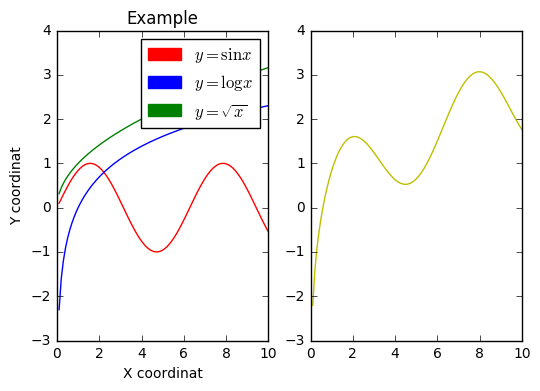

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = np.linspace(0.1, 10, 100)

fig = plt.figure()
plt.subplot(121)
plt.title('Example')
plt.xlabel('X coordinat')
plt.ylabel('Y coordinat')


sinx_g = mpatches.Patch(color='red', label='$y=\sin{x}$')
logx_g = mpatches.Patch(color='blue', label='$y=\log{x}$')
sqrtx_g = mpatches.Patch(color='green', label='$y=\sqrt{x}$')
plt.legend(handles=[sinx_g, logx_g, sqrtx_g])
plt.plot(x, np.sin(x), 'r')
plt.plot(x, np.log(x), 'b')
plt.plot(x, np.sqrt(x), 'g')

plt.subplot(122)
plt.plot(x, np.log(x) + np.sin(x), 'y')

plt.show()
fig.savefig('temp2.png')

## SciPy

In [12]:
import scipy as scp
from scipy.stats import norm

norm.mean = 0
norm.var = 1
arr = np.ndarray(shape=(5, 5))
for i in range(5):
    for j in range(5):
        arr[i][j] = norm.rvs()
print arr

[[-0.75722833  0.99564128  0.73586647 -0.6043044  -0.42900085]
 [-1.08259629  0.88186156  1.43115392 -1.46079908  0.30323547]
 [ 0.27704053 -0.27921406  1.17353583 -0.3270192   1.12265656]
 [-0.35801965  0.09617606  0.28038683  1.70534655  0.09596028]
 [ 0.5664658  -0.35336429 -0.23787649 -0.61803319 -0.52865897]]


In [13]:
from scipy import linalg
la, v = linalg.eig(arr)

for i in range(5):
    print linalg.norm(arr.dot(v[:, i]) - v[:, i] * la[i])

1.84826136967e-15
1.84826136967e-15
8.94505244511e-16
1.44153850833e-15
2.07573853642e-15
